In [1]:
%autosave 0

Autosave disabled


In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from adam_wrangle import train_val_test
from scipy import stats

Let's read in our dataset.

For reference, I have [documentation](https://www.brilliance.com/education/diamonds/depth-table) for the depth and table features of the dataset.

Here is more [information](https://www.vrai.com/journal/post/diamond-clarity-chart) on diamond clarity.

[Here](https://www.diamonds.pro/education/color/) we can learn more about diamond color.

Fun picture:

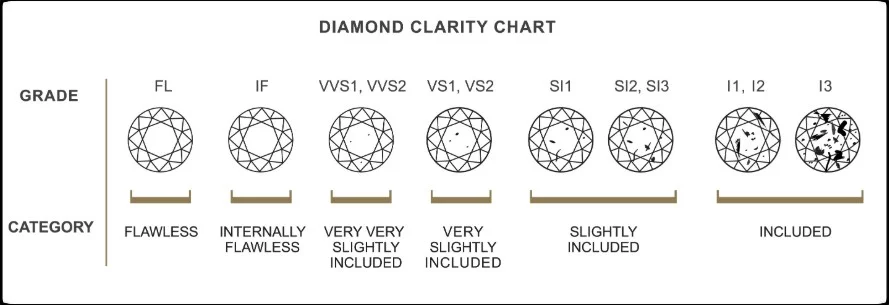

In [3]:
df = pd.read_csv('diamonds.csv', index_col=0)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


What are some things we should do initially?

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


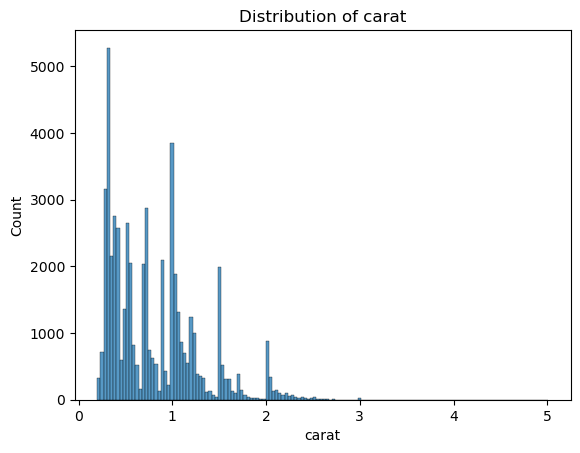

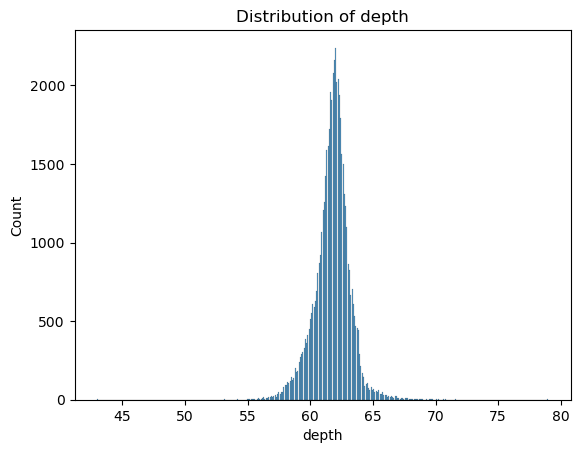

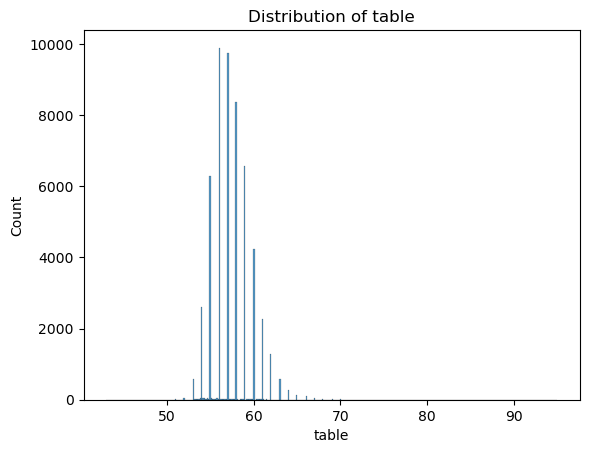

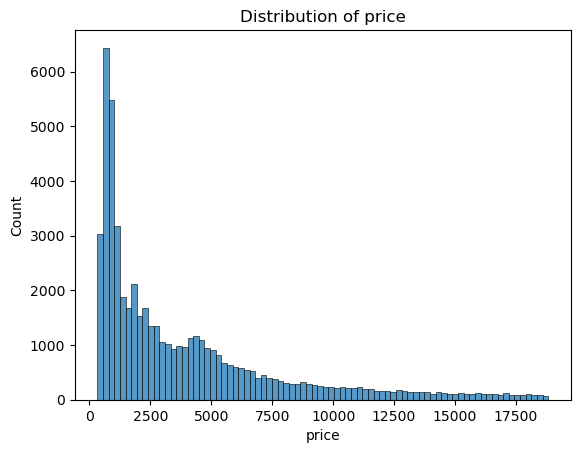

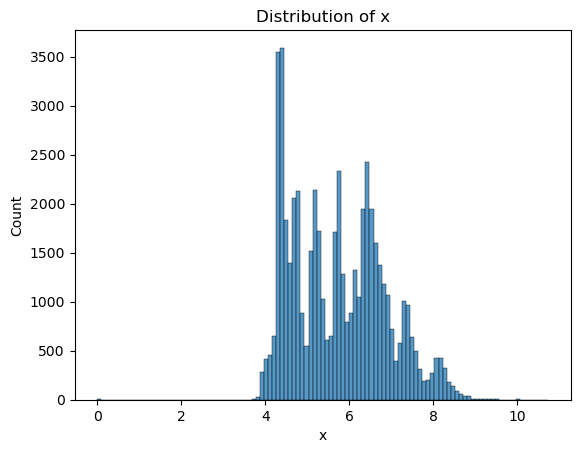

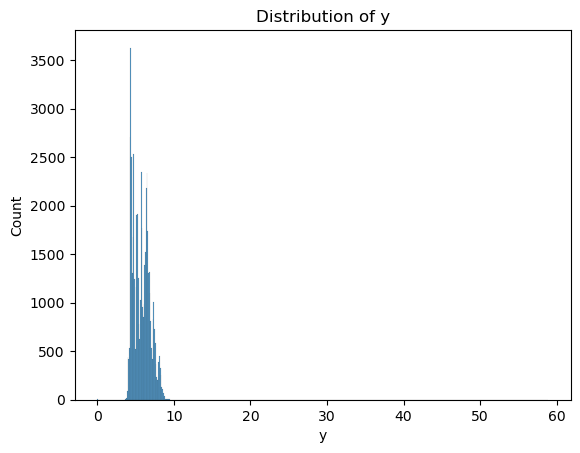

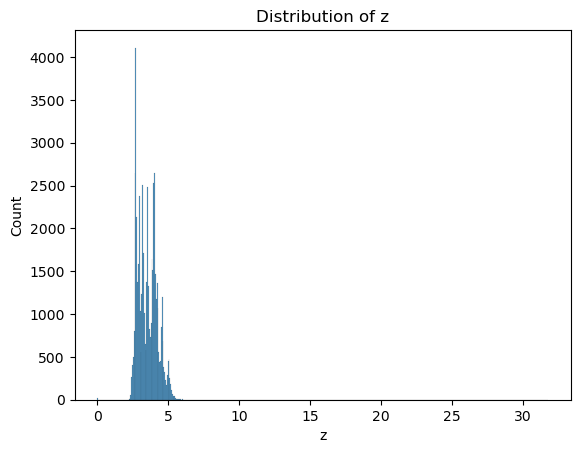

In [6]:
for col in df.columns[df.dtypes != 'object']:

    plt.figure()
    sns.histplot(data = df, x = col)
    plt.title(f'Distribution of {col}')
    plt.show()

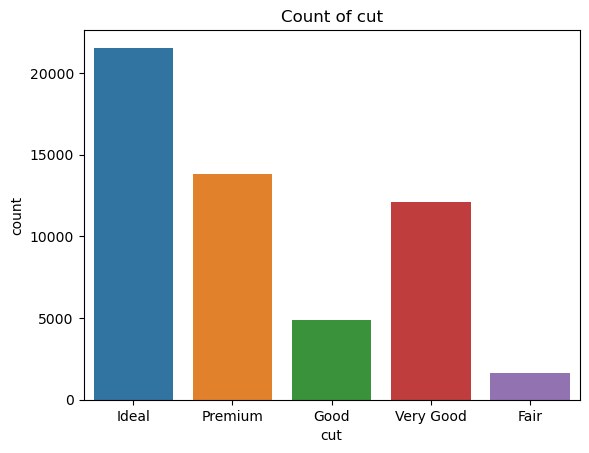

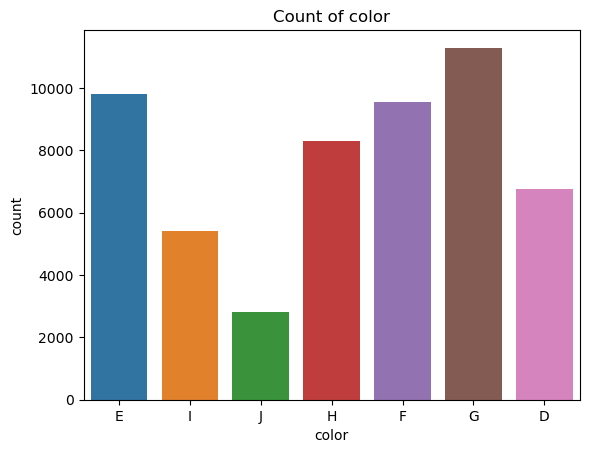

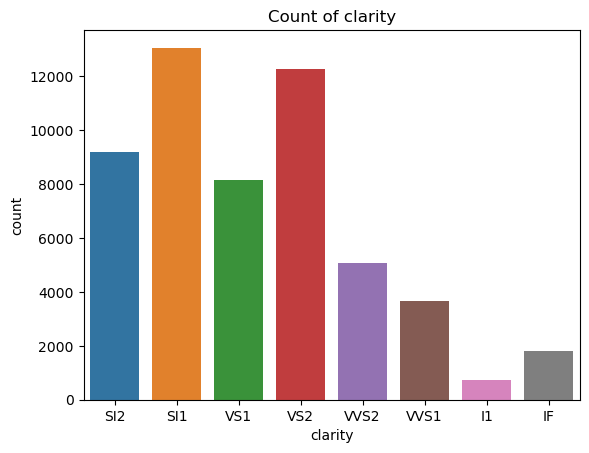

In [7]:
for col in df.columns[df.dtypes == 'object']:

    plt.figure()
    sns.countplot(data = df, x = col)
    plt.title(f'Count of {col}')
    plt.show()

Now that we want to explore relationships between features in our dataset, what do we need to do?

In [8]:
train, val, test = train_val_test(df)
train.shape, val.shape, test.shape

((37758, 10), (8091, 10), (8091, 10))

In [9]:
train.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
19498,1.21,Ideal,H,VVS2,61.3,57.0,8131,6.92,6.87,4.23
31230,0.31,Ideal,E,VS2,62.0,56.0,756,4.38,4.36,2.71
22312,1.21,Ideal,E,VS1,62.4,57.0,10351,6.75,6.83,4.24
279,0.81,Ideal,F,SI2,62.6,55.0,2795,5.92,5.96,3.72
6647,0.79,Ideal,I,VVS2,61.7,56.0,4092,5.94,5.95,3.67


What are some questions we want to ask of our data?

* Does clarity have a realtionship with price?
* Does depth hvae a relationship with price?
* Does carat have a relationship with price?

## Question 1

Does clarity affect price?

clarity is categorical and price is continous

In [10]:
train.clarity.value_counts()

SI1     9217
VS2     8585
SI2     6387
VS1     5723
VVS2    3515
VVS1    2570
IF      1248
I1       513
Name: clarity, dtype: int64

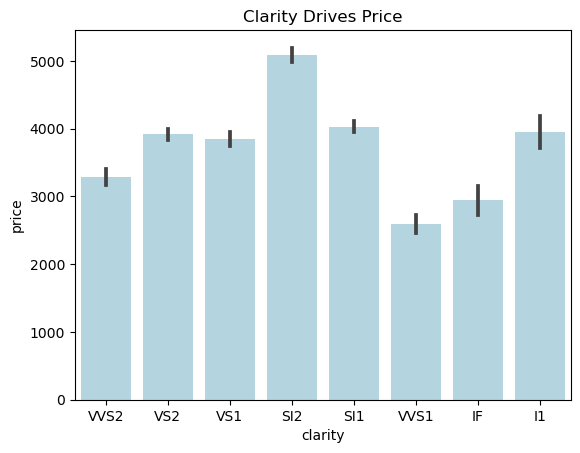

In [11]:
sns.barplot(data = train, x='clarity', y='price', color='lightblue').set(title='Clarity Drives Price')
plt.show()

Yes, clarity may have a relationship with price. Using my domain knowledge, the most clear diamonds do no have the highest average price.

I think other features of this data set may have a greater impact on price.

## Question 2

Does depth affect price?

depth is continuous and price is continuous.

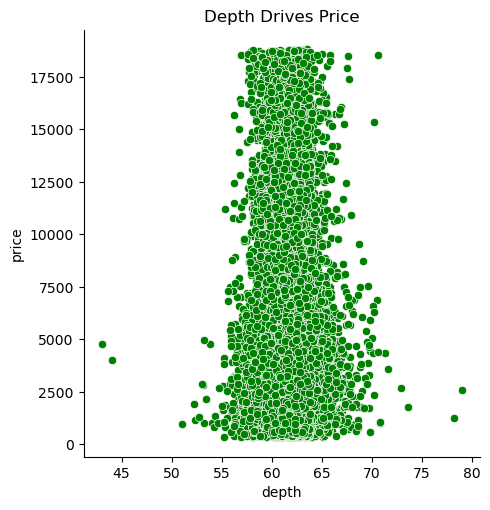

In [12]:
sns.relplot(data = train, x='depth', y='price', color='green').set(title='Depth Drives Price')
plt.show()

Judging by the chart depth will not help us predict price.

## Question 3

Does carat size affect price?

carat is continuous and price is continuous.

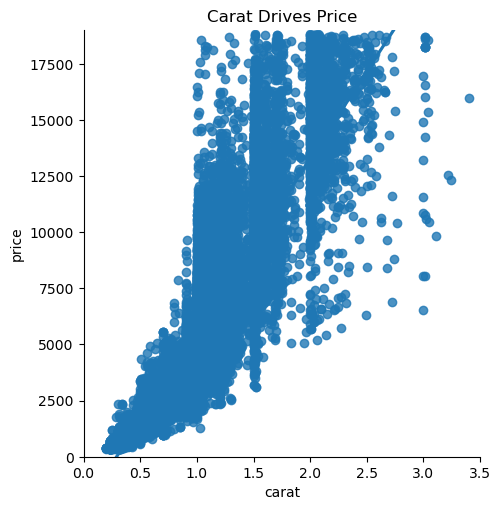

In [30]:
sns.lmplot(data = train, x='carat', y='price').set(title='Carat Drives Price')
plt.ylim(0, 19000)
plt.xlim(0, 3.5)
plt.show()

Null Hypothesis: There is no correlation between carat and price.  
Alternative HYpothesis: The is a correlation between carat and price.

In [27]:
r, p = stats.spearmanr(train.carat, train.price)
r, p

(0.9631084633416993, 0.0)

In [33]:
a = 0.05

if p < a:

    print("Reject the null")
    
else:
    
    print('Fail to reject the null')

Reject the null


There is a strong positive correlation between carat sand price. The relationship is significant, and I think carat will help model predict price.